**Name: Vinayak Renu Nair**

**PANTHER ID : 002553736**

In [1]:
!unzip '/content/drive/MyDrive/exam1_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: exam1_dataset/TRAINING/positive/5511_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5512_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5513_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5514_9.txt  
  inflating: exam1_dataset/TRAINING/positive/5515_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5516_7.txt  
  inflating: exam1_dataset/TRAINING/positive/5517_9.txt  
  inflating: exam1_dataset/TRAINING/positive/5518_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5519_9.txt  
  inflating: exam1_dataset/TRAINING/positive/551_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5520_9.txt  
  inflating: exam1_dataset/TRAINING/positive/5521_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5522_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5523_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5524_8.txt  
  inflating: exam1_dataset/TRAINING/positive/5525_8.txt  
  inflating: exam1_dat

In [1]:
import os, random
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split
nltk.download('reuters')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt



[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Question 1) (20 points) Write a generic function that takes: Classification algorithm name,
vectorization method name, training set with labels as parameters (total of 3 parameters should
be passed). The function should take the classification algorithm name, the vectorization
method’s name, and the training set and train the desired model. Use the default training
parameters for the models we have seen in class. This function should return the trained model.


In [ ]:
def model(algo,vect_method,train_set):
  train1 = train_set[0]
  train2 = train_set[1]
  if algo=="Naive Bayes":
    if vect_method=="bag of words":
      model = make_pipeline(CountVectorizer(), MultinomialNB())
      model.fit(train1,train2)
      return model


    if vect_method=="tfidf":
      model = make_pipeline(TfidfVectorizer(), MultinomialNB())
      model.fit(train1,train2)  
      return model 
  
  elif algo == 'RandomForest':
    if vect_method=="bag of words":
      model = make_pipeline(CountVectorizer(), RandomForestClassifier())
      model.fit(train1,train2)
      return model

    if vect_method=="tfidf":
      model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
      model.fit(train1,train2)
      return model

  elif algo == 'SVM':
    if vect_method=="bag of words":
      model = make_pipeline(CountVectorizer(), SVC(gamma='auto'))
      model.fit(train1,train2)
      return model

    if vect_method=="tfidf":
      model = make_pipeline(TfidfVectorizer(), SVC(gamma='auto'))
      model.fit(train1,train2)
      return model

Question 2) (30 points) Using the function from question 1 to build the following models:
a) Model a: Naive Bayes, Vectorizer: TFIDF and Bag of Words, Training set should be 75%
of the provided dataset. Leaving the remaining 25% for testing.
b) Model b: RandomForest, Vectorizer: TFIDF and Bag of Words, Training set should be
70% of the provided dataset. Leaving the remaining 30% for testing.
c) Model c: Support Vector Machines (SVC in sklearn), Vectorizer: TFIDF and Bag of
Words, Training set should be 60% of the provided dataset. Leaving the remaining 40%
for testing.
NOTE: Set the random seed to: 12345. This needs to be consistently set to train the model
AND split the data in test and train. If this is not done correctly, you will lose points as your
answers will not be comparable with the grading key.

In [ ]:
path = '/content/exam1_dataset/TRAINING/negative/'
path1 = '/content/exam1_dataset/TRAINING/positive/'
txt = os.listdir(path)
txt1 = os.listdir(path1)
data = []
label = []
for f in txt :
  data.append(open(os.path.join(path,f), 'r').read())
  label.append(0)
for t in txt1 :
  data.append(open(os.path.join(path1,t), 'r').read())
  label.append(1)

In [ ]:
 data = np.array(data) 

In [ ]:
x1_train ,x1_test,y1_train,y1_test = train_test_split(data,label,test_size=0.25)
train_set = [x1_train,y1_train]
m1 = model("Naive Bayes","bag of words",train_set)

In [ ]:
x1_train ,x1_test,y1_train,y1_test = train_test_split(data,label,test_size=0.25)
train_set = [x1_train,y1_train]
m2 = model("Naive Bayes","tfidf",train_set)

In [ ]:
x2_train ,x2_test,y2_train,y2_test = train_test_split(data,label,test_size=0.3)
train_set = [x2_train,y2_train]
m3 = model("RandomForest","bag of words",train_set)

In [ ]:
x2_train ,x2_test,y2_train,y2_test = train_test_split(data,label,test_size=0.3)
train_set = [x2_train,y2_train]
m4 = model("RandomForest","tfidf",train_set)

In [ ]:
x3_train ,x3_test,y3_train,y3_test= train_test_split(data,label,test_size=0.4)
train_set = [x3_train,y3_train]
m5 = model("SVM","bag of words",train_set)

In [ ]:
x3_train ,x3_test,y3_train,y3_test= train_test_split(data,label,test_size=0.4)
train_set = [x3_train,y3_train]
m6 = model("SVM","tfidf",train_set)

In [ ]:
l1 = m1.predict(x1_test)

In [ ]:
l2=m2.predict(x1_test)

In [ ]:
l3=m3.predict(x2_test)

In [ ]:
l4=m4.predict(x2_test)

In [ ]:
l5=m5.predict(x3_test)

In [ ]:
l6=m6.predict(x3_test)

Question 3) (30 points) Using the models from Question 2, evaluate each model with its
respective training set (for model a, that set is 25% of the data, for model b, that set is 30% of
the data, and for model c that set is 40% of the data. Be careful to not mix up the evaluation
sets. With the predictions on the test set and show the following metrics: Accuracy, Precision,
Recall, and Macro F1-score. With this in mind, please write and answer these questions in your
notebook:
a) What model performs the best and why? (which metrics do you base this on, and why do
you think it performs better than others).
b) Why is it important not to mix up the testing sets between different models? Think about
this one.
c) Display in a single sorted dataframe (model name, training %, test %, accuracy,
precision, recall, F1-score) all performance metrics, sorted by accuracy in descending
manner.

In [ ]:

print('Accuracy:',accuracy_score(y1_test,l1))
acc = accuracy_score(y1_test,l1)
print('Precision:', precision_score(y1_test,l1,pos_label='positive',average='micro'))
pre = precision_score(y1_test,l1,pos_label='positive',average='micro')
print('Recall:', recall_score(y1_test,l1,pos_label='positive',average='micro'))
rec = recall_score(y1_test,l1,pos_label='positive',average='micro')
print('F1 Score:', f1_score(l1, y1_test, average='macro'))
f1 = f1_score(l1, y1_test, average='macro')

Accuracy: 0.89408
Precision: 0.89408
Recall: 0.89408
F1 Score: 0.8940070198478292


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
import pandas as pd

df = pd.DataFrame([acc,pre,rec,f1],index=['Accuracy','Precision','Recall','F1 Score'],columns=['Naive Bayes-BOW'])
print(df)

           Naive Bayes-BOW
Accuracy          0.894080
Precision         0.894080
Recall            0.894080
F1 Score          0.894007


In [ ]:
print('Accuracy:',accuracy_score(y1_test,l2))
acc = accuracy_score(y1_test,l2)
print('Precision:', precision_score(y1_test,l2,pos_label='positive',average='micro'))
pre = precision_score(y1_test,l2,pos_label='positive',average='micro')
print('Recall:', recall_score(y1_test,l2,pos_label='positive',average='micro'))
rec = recall_score(y1_test,l2,pos_label='positive',average='micro')
print('F1 Score:', f1_score(l2, y1_test, average='macro'))
f1 = f1_score(l2, y1_test, average='macro')

Accuracy: 0.86464
Precision: 0.86464
Recall: 0.86464
F1 Score: 0.8645700912978158


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
Model2 = [acc,pre,rec,f1]
df['Naive Bayes-TFIDF'] = Model2
print(df)

           Naive Bayes-BOW  Naive Bayes-TFIDF
Accuracy          0.894080            0.86464
Precision         0.894080            0.86464
Recall            0.894080            0.86464
F1 Score          0.894007            0.86457


In [ ]:
print('Accuracy:',accuracy_score(y2_test,l3))
acc = accuracy_score(y2_test,l3)
print('Precision:', precision_score(y2_test,l3,pos_label='positive',average='micro'))
pre = precision_score(y2_test,l3,pos_label='positive',average='micro')
print('Recall:', recall_score(y2_test,l3,pos_label='positive',average='micro'))
rec = recall_score(y2_test,l3,pos_label='positive',average='micro')
print('F1 Score:', f1_score(l3, y2_test, average='macro'))
f1 = f1_score(l3, y2_test, average='macro')

Accuracy: 0.9524
Precision: 0.9524
Recall: 0.9524
F1 Score: 0.9523988414935822


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
Model3 = [acc,pre,rec,f1]
df['RandomForest-BOW'] = Model3
print(df)

           Naive Bayes-BOW  Naive Bayes-TFIDF  RandomForest-BOW
Accuracy          0.894080            0.86464          0.952400
Precision         0.894080            0.86464          0.952400
Recall            0.894080            0.86464          0.952400
F1 Score          0.894007            0.86457          0.952399


In [ ]:
print('Accuracy:',accuracy_score(y2_test,l4))
acc = accuracy_score(y2_test,l4)
print('Precision:', precision_score(y2_test,l4,pos_label='positive',average='micro'))
pre = precision_score(y2_test,l4,pos_label='positive',average='micro')
print('Recall:', recall_score(y2_test,l4,pos_label='positive',average='micro'))
rec = recall_score(y2_test,l4,pos_label='positive',average='micro')
print('F1 Score:', f1_score(l4, y2_test, average='macro'))
f1 = f1_score(l4, y2_test, average='macro')

Accuracy: 0.8253333333333334
Precision: 0.8253333333333334
Recall: 0.8253333333333334
F1 Score: 0.8253330228142628


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
Model4 = [acc,pre,rec,f1]
df['RandomForest-TFIDF'] = Model4
print(df)

           Naive Bayes-BOW  ...  RandomForest-TFIDF
Accuracy          0.894080  ...            0.825333
Precision         0.894080  ...            0.825333
Recall            0.894080  ...            0.825333
F1 Score          0.894007  ...            0.825333

[4 rows x 4 columns]


In [ ]:
print('Accuracy:',accuracy_score(y3_test,l5))
acc = accuracy_score(y3_test,l5)
print('Precision:', precision_score(y3_test,l5,pos_label='positive',average='micro'))
pre = precision_score(y3_test,l5,pos_label='positive',average='micro')
print('Recall:', recall_score(y3_test,l5,pos_label='positive',average='micro'))
rec = recall_score(y3_test,l5,pos_label='positive',average='micro')
print('F1 Score:', f1_score(l5, y3_test, average='macro'))
f1 = f1_score(l5, y3_test, average='macro')

Accuracy: 0.7237
Precision: 0.7237
Recall: 0.7237
F1 Score: 0.7235447178325594


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
Model5 = [acc,pre,rec,f1]
df['SVM-BOW'] = Model5
print(df)

           Naive Bayes-BOW  Naive Bayes-TFIDF  ...  RandomForest-TFIDF   SVM-BOW
Accuracy          0.894080            0.86464  ...            0.825333  0.723700
Precision         0.894080            0.86464  ...            0.825333  0.723700
Recall            0.894080            0.86464  ...            0.825333  0.723700
F1 Score          0.894007            0.86457  ...            0.825333  0.723545

[4 rows x 5 columns]


In [ ]:
print('Accuracy:',accuracy_score(y3_test,l6))
acc = accuracy_score(y3_test,l6)
print('Precision:', precision_score(y3_test,l6,pos_label='positive',average='micro'))
pre = precision_score(y3_test,l6,pos_label='positive',average='micro')
print('Recall:', recall_score(y3_test,l6,pos_label='positive',average='micro'))
rec = recall_score(y3_test,l6,pos_label='positive',average='micro')
print('F1 Score:', f1_score(l6, y3_test, average='macro'))
f1 = f1_score(l6, y3_test, average='macro')

Accuracy: 0.496
Precision: 0.496
Recall: 0.496
F1 Score: 0.3315508021390374


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
Model6 = [acc,pre,rec,f1]
df['SVM-TFIDF'] = Model6
print(df)

           Naive Bayes-BOW  Naive Bayes-TFIDF  ...   SVM-BOW  SVM-TFIDF
Accuracy          0.894080            0.86464  ...  0.723700   0.496000
Precision         0.894080            0.86464  ...  0.723700   0.496000
Recall            0.894080            0.86464  ...  0.723700   0.496000
F1 Score          0.894007            0.86457  ...  0.723545   0.331551

[4 rows x 6 columns]


a) Model 3 - Random Forest using Bag of words has highest accuracy based on the result 

b) If we mix up the testing sets , it will affect the way in which the model has to be trained

Question 4) (15 points) Using the documents in the folder named UNLABELED, please use
your best performing trained model from question 3 to predict their labels. Please do this
individually for each document. Print to the screen the following items: Document Name,
Predicted Label and using a text cell, write your own opinion if the label is correct and why -
note you have to read the document to make your own opinion

In [ ]:
p = '/content/exam1_dataset/UNLABELED/0_0.txt'
txts = open(p, 'r').read()

In [ ]:
l=m3.predict([txts])

In [ ]:
print("name of file : 0_0.txt")
print("label : ",l)


name of file : 0_0.txt
label :  [1]


It is predicted as positive , but actually its a negeative review

In [ ]:
p = '/content/exam1_dataset/UNLABELED/24221_0.txt'
txts = open(p, 'r').read()

In [ ]:
l=m3.predict([txts])

In [ ]:
print("name of file : 24221_0.txt")
print("label : ",l)


name of file : 24221_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/35968_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 35968_0.txt")
print("label : ",l)


name of file : 35968_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/35991_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 35991_0.txt")
print("label : ",l)


name of file : 35991_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/36022_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 36022_0.txt")
print("label : ",l)


name of file : 36022_0.txt
label :  [1]


It is predicted positive, and the review is also positive.

In [ ]:
p = '/content/exam1_dataset/UNLABELED/36149_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 36149_0.txt")
print("label : ",l)


name of file : 36149_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/36517_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 36517_0.txt")
print("label : ",l)


name of file : 36517_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/37154_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 37154_0.txt")
print("label : ",l)


name of file : 37154_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/46278_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 46278_0.txt")
print("label : ",l)


name of file : 46278_0.txt
label :  [0]


It is predicted negative, but the review is positive 

In [ ]:
p = '/content/exam1_dataset/UNLABELED/46705_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 46705_0.txt")
print("label : ",l)


name of file : 46705_0.txt
label :  [0]


It is predicted negative, and the review is also negative

In [ ]:
p = '/content/exam1_dataset/UNLABELED/49990_0.txt'
txts = open(p, 'r').read()

l=m3.predict([txts])
print("name of file : 49990_0.txt")
print("label : ",l)


name of file : 49990_0.txt
label :  [0]


It is predicted negative, and the review is also negative

Question 5) (20 points) Build a function that takes the set of documents as input and returns a
cosine similarity matrix for those documents. Feed all documents in the TRAINING folder to this
matrix. Instead of printing the returned cosine similarity matrix, create a heatmap plot from the
returned matrix. Make sure your plot is nicely scaled, properly labeled, and uses a nice color
range to show the similarity.

In [2]:
path = '/content/exam1_dataset/TRAINING/negative/'
path1 = '/content/exam1_dataset/TRAINING/positive/'
txt = os.listdir(path)
txt1 = os.listdir(path1)
data = []

for f in txt :
  data.append(open(os.path.join(path,f), 'r').read())

for t in txt1 :
 data.append(open(os.path.join(path1,t), 'r').read())

In [3]:
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(data)

In [4]:
cosine_sim = cosine_similarity(matrix,matrix)
print(cosine_sim)

[[1.         0.12134724 0.19976253 ... 0.15130019 0.18361394 0.15295379]
 [0.12134724 1.         0.09622225 ... 0.08405957 0.09697443 0.09215003]
 [0.19976253 0.09622225 1.         ... 0.13436608 0.15388305 0.17163435]
 ...
 [0.15130019 0.08405957 0.13436608 ... 1.         0.16615901 0.12673634]
 [0.18361394 0.09697443 0.15388305 ... 0.16615901 1.         0.14520204]
 [0.15295379 0.09215003 0.17163435 ... 0.12673634 0.14520204 1.        ]]


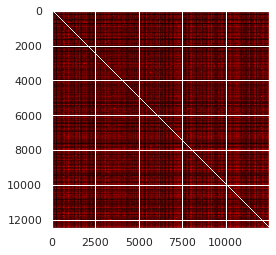

In [5]:
#sns.heatmap(cosine_sim, square=True, annot=True)
#plt.xlabel('true label')
#plt.ylabel('predicted label');

plt.imshow(cosine_sim, cmap='hot', interpolation='nearest')
plt.show()

Question 6) (15 points) Write a function that takes a cosine similarity matrix as input and
returns a list with the top n document paris and their similarity. Note that you should only keep
the document pairs that are unique and remove the comparisons of the document to itself. Print
the top 50 similar document pairs. Compare the assigned class for each document and answer:
Do all similar documents belong to the same class? Why or why not?


Question 7) (20 points) Using Spacy’s part of speech tagger, process all sentences (hint: don’t
forget to split the reviews) and count how many NOUN and VERB tags are found in all the
movies review (TRAINING folder) separating them by label. In other words, how many NOUN
and VERB tags are found in positive reviews, and how many NOUN and VERB tags are found
in negative reviews. Answer the following question: When comparing both, do you see any
differences? Why do you think about the differences? Or lack of them.

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
count = 0
co = 0
directory = '/content/exam1_dataset/TRAINING/negative/'
for f in os.listdir(directory):
  t = open(os.path.join(directory,f), 'r').read()
  doc = nlp(t)

  for token in doc:
    z=token.pos_
    if z=='NOUN':
      count+=1
    elif z=='VERB':
      co+=1

print("Number of nouns in negative reviews : ",count)    
print("Number of verbs in negative reviews : ",co)  

Number of nouns in negative reviews :  528475
Number of verbs in negative reviews :  355559


In [ ]:
h = 0
y = 0
directory = '/content/exam1_dataset/TRAINING/positive/'
for f in os.listdir(directory):
  t = open(os.path.join(directory,f), 'r').read()
  doc = nlp(t)

  for token in doc:
    z=token.pos_
    if z=='NOUN':
      h+=1
    elif z=='VERB':
      y+=1
print("Number of nouns in positive reviews : ",h)    
print("Number of verbs in positive reviews : ",y)    

Number of nouns in positive reviews :  542978
Number of verbs in positive reviews :  342125


There is a difference in the counts in both positive and negative reviews

Question 8) (20 points) Using the results from the PoS process in question 7, count how many
different PUNCT tags are found and their respective counts from the full dataset provided (both
negative and positives together). Using regex, write a set of regular expressions that generate
the same counts from the dataset without using NLTK or Spacy, just regex. Can you get the
same counts? If not, why do you think this is?


In [ ]:
frequency = {}

directory = '/content/exam1_dataset/TRAINING/positive/'
for f in os.listdir(directory):
  t = open(os.path.join(directory,f), 'r').read()
  doc = nlp(t)

  for token in doc:
    z=token.pos_
    if z=='PUNCT':
      if token.text in frequency: frequency[token.text] +=1
      else : frequency[token.text] = 1


In [ ]:
directory = '/content/exam1_dataset/TRAINING/negative/'
for f in os.listdir(directory):
  t = open(os.path.join(directory,f), 'r').read()
  doc = nlp(t)

  for token in doc:
    z=token.pos_
    if z=='PUNCT':
      if token.text in frequency: frequency[token.text] +=1
      else : frequency[token.text] = 1


In [ ]:
print(frequency)

{',': 275296, '--': 4046, '.': 236532, '"': 63328, '!': 21913, '?': 14797, '-': 47563, '(': 33106, ')': 32850, '/>But': 818, ';': 6521, '/><br': 7171, '/>PS': 25, ':': 9396, '/>They': 102, '/>Simply': 13, '/>Oscar': 2, '/>First': 180, '/>Neal': 1, '/>Are': 11, '...': 9726, '/>Both': 39, '/>While': 248, '/>That': 237, '.....': 314, '/>William': 16, '/>The': 6996, '/>Nice': 11, '/>This': 1993, '....': 1148, 'himself.<br': 2, '/>All': 406, '/>After': 185, '/>Watch': 82, '/>A': 279, '/>Ray': 3, '/>If': 918, '/>Allen': 7, '/>Toni': 2, '......': 125, '/>Recommend': 2, 'around.<br': 26, '/>At': 198, '/>Anyway': 161, 'drama.<br': 6, '/>Well': 193, '/>10/10': 32, "'": 14119, '/>There': 974, '/>but': 15, '/>xx': 2, 'acted.<br': 5, '/>One': 337, '/>Overall': 313, '/>Did': 25, "/>I'm": 244, '/>"Dangerous': 1, '/>Perhaps': 74, '/>It': 1590, '/>Try': 13, '/>Had': 12, '/>Pretty': 14, '*': 5510, '/>She': 52, '/>Paul': 33, '/>Shara': 1, '\x96': 1211, '{': 98, '/>To': 251, "/>'The": 15, '/>Two': 61, '/>

In [ ]:
path = '/content/exam1_dataset/TRAINING/negative/'
path1 = '/content/exam1_dataset/TRAINING/positive/'
txt = os.listdir(path)
txt1 = os.listdir(path1)
data = []

for f in txt :
  data.append(open(os.path.join(path,f), 'r').read())

for t in txt1 :
  data.append(open(os.path.join(path1,t), 'r').read())


In [ ]:
str1 = ''.join(data)

In [ ]:
import re
ans = re.findall(r'(.*\\!)*?',str1)

Bonus Question: (40 points) Using the code from Class 09 - Word Embeddings, pre-tune
BERT in order to classify movie reviews. You can use the full TRAINING folder for the tuning
and use the UNLABELED folder for your final classification/prediction task. Do the label
predictions from BERT match what your classifier from Question 4 predicted? If they don’t, are
they better? Please say why.

In [1]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

if torch.cuda.is_available():    
     
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [3]:
!pip install transformers

     |████████████████████████████████| 1.9MB 5.8MB/s 
     |████████████████████████████████| 890kB 40.5MB/s 
     |████████████████████████████████| 3.2MB 41.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=ccf5e4e7104dc8d03342167241a71bd66181958b15ea3c0cb741edca4ba487ca
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:

from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...
